# Handwriting Recognition

# Import Tensor flow

In [1]:
import tensorflow as tf

# The Data set
### Import Data Set from mnist library

In [2]:
from tensorflow.keras.datasets import mnist #Forget about the error it is a minor issure
(x_train,y_train), (x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


### Shapes of Imported Array


In [3]:
print("x_Train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_Train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


### Plot an Image from data set


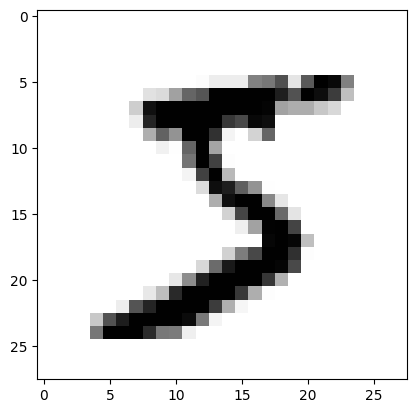

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(x_train[0],cmap="binary")
plt.show()

### Displaying Training DataSet labels


In [5]:
y_train[0]

5

In [6]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


# One Hot Encoding
#### Import Data Set from mnist library
#### After this encoding, every label will be converted to a list with 10 elements and the element at index to the corresponding class will be set to 1, rest will be set to 0:

##### original label -> one-hot encoded label

#### 5 ->     [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
#### 7 ->    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
#### 1->     [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]


### Encoding Labels


In [7]:
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

### Validating Shapes of test Data


In [8]:
print("y_train_encoded", y_train_encoded)
print("y_test_encoded", y_test_encoded)

y_train_encoded [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
y_test_encoded [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Display Encoded Labels


In [9]:
y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

# Task 4 : Neural Networks


# Task 5: Preprocessing the Examples
## Unrolling Ndimensional Array to Vectors


In [10]:
import numpy as np

x_train_reshaped = np.reshape(x_train,(60000,784))
x_test_reshaped = np.reshape(x_test,(10000,784))
print("x_train_reshaped", x_train_reshaped)
print("x_test_reshaped", x_test_reshaped)

x_train_reshaped [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
x_test_reshaped [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Display Pixel Value



In [11]:
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


### Data Normalization
##### Data is being normalized to allow efficient computing on the pixel values, this was done by reducing the scale and distribution of the values


In [12]:
import numpy as np
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)
epsilon = 1e-10

x_train_norm = (x_train_reshaped - x_mean) / (x_std + epsilon) # Adding epsilon reduces the unstability in the computation of data

# We used the same mean an standard deviation for the test set and training set in order to remove unecessary bias
x_test_norm = (x_test_reshaped - x_mean) / (x_std + epsilon)


### Display Normalized Data


In [13]:
print(set(x_train_norm[0]))

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

# Task 6 : Creating A model


### The first step in the node is the linear sum of the inputs

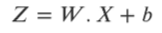

### The second step is processing output using an activation function
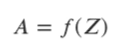


### Graphical representation of a node where the two operations are performed
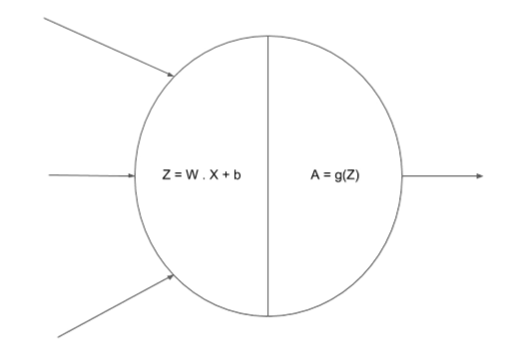
        

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    # First Layer
    Dense(128, activation="relu", input_shape=(784,)),

    #Second Layer

    # relu: acts as a linear function for all positive values and set to zero for the other functions

    # softmax: gives the probability scores for various nodes, the class with the highest probability scores gives us our output

    Dense(128, activation="relu"), #Input shape does not need to be specified as it is implide in the firs layer

    #Third Layer
    Dense(10, activation="softmax")


])

/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compiling the Model

In [15]:
model.compile(

    #Defines the optimizer algorithm
    optimizer="sgd",

    #This has to do with the difference between the model generated output and
    # the original output (loss should be minimized)
    loss='categorical_crossentropy',

    metrics = ['accuracy']

)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

### Training the Model

In [16]:
model.fit(x_train_norm, y_train_encoded,epochs=3)#epochs has to do with the number of iterations to test the training data

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 441us/step - accuracy: 0.8286 - loss: 0.5850
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 458us/step - accuracy: 0.9434 - loss: 0.1928
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 477us/step - accuracy: 0.9579 - loss: 0.1436


### Evaluating the Model

In [17]:
#uses the test data with the model and compares the predictions with the
#original y values
loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)
print("Accuracy of model is" , accuracy*100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - accuracy: 0.9535 - loss: 0.1512
Accuracy of model is 96.06000185012817


# Task 8: Predicitions
## Predictions on Test Set


In [18]:
preds = model.predict(x_test_norm)
print("Shape of preds" , preds)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step
Shape of preds [[2.1360123e-05 4.3604447e-07 2.6449494e-04 ... 9.9682796e-01
  9.0988096e-06 2.2681726e-05]
 [3.6118689e-04 3.8609651e-04 9.8913884e-01 ... 8.1997937e-09
  8.2976781e-05 3.0080280e-08]
 [1.1142756e-05 9.9273026e-01 2.0012539e-03 ... 1.6785642e-03
  1.2949354e-03 3.4905734e-04]
 ...
 [4.2830512e-09 8.7863565e-09 5.4804282e-08 ... 2.6483622e-05
  1.2496414e-04 3.9572580e-04]
 [6.6625318e-05 3.1126994e-05 4.0779629e-05 ... 3.1728842e-07
  4.0505333e-03 6.7393416e-06]
 [4.3327254e-06 8.4697660e-08 5.0017228e-05 ... 2.7240197e-09
  8.2940289e-07 7.8954578e-08]]


### Plotting the results

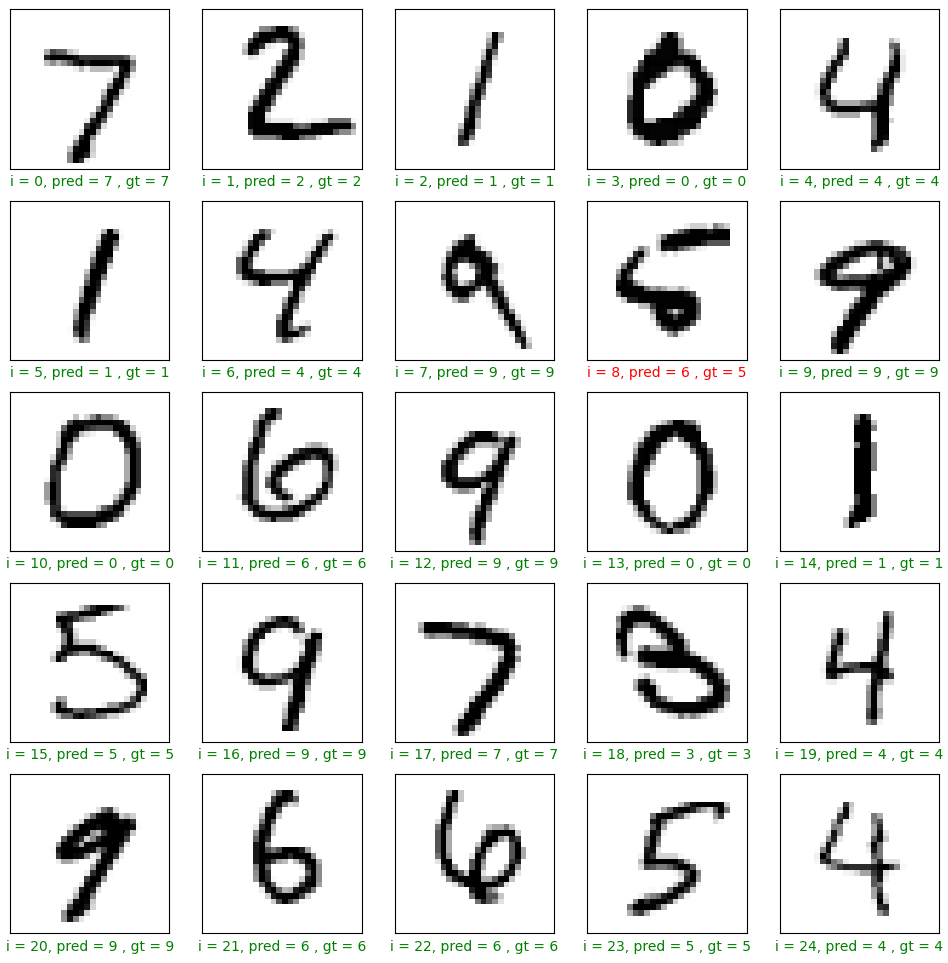

In [19]:
plt.figure(figsize = (12,12))
start_index = 0

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    pred = np.argmax(preds[start_index+i]) # predictions
    gt = y_test[start_index+i] # original y value

    col = "g"
    if pred != gt:
      col = "r"
    plt.xlabel("i = {}, pred = {} , gt = {}".format(start_index+i,pred,gt), color = col )
    plt.imshow(x_test[start_index+i], cmap="binary")

plt.show()



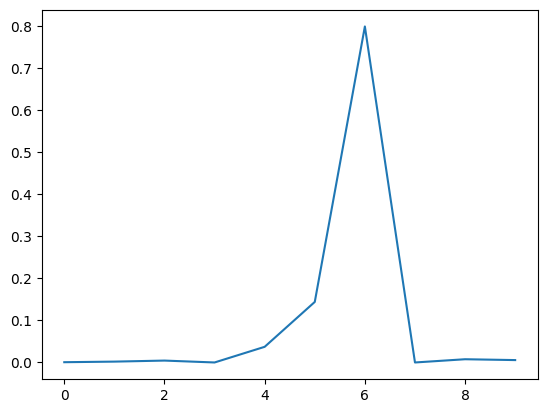

In [20]:
plt.plot(preds[8])
plt.show()